In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#pythonda uyarıları kapatalım

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#veriyi içe aktaralım
veri = pd.read_csv("olimpiyatlar.csv")
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
veri.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
#sütun isimlerini değiştirelim

veri.rename(columns = {"ID"     : "id",
                       "Name"   : "isim",
                       "Gender" : "cinsiyet",
                       "Age"    : "yas",
                       "Height" : "boy",
                       "Weight" : "kilo",
                       "Team"   : "takim",
                       "NOC"    : "uok",
                       "Games"  : "oyunlar",
                       "Year"   : "yil",
                       "Season" : "sezon",
                       "City"   : "sehir",
                       "Sport"  : "spor",
                       "Event"  : "etkinlik",
                       "Medal"  : "madalya"
                       }, inplace = True)

veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [ ]:
#id sütunu veri hakkında bilgi vermediği için ve oyunlar sütunu mükerrer olduğun için silelim.

veri = veri.drop(["id", "oyunlar"], axis = 1) # axis = 1 sütun anlamında
veri.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [ ]:
# boy ve kilo sütunundaki eksik değerleri o kişinin katıldığı etkinlik ortalamasna göre dolduralım.

essiz_etkinlik = pd.unique(veri.etkinlik)
print(f"Eşsiz etkinlik sayısı: {len(essiz_etkinlik)}")
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [ ]:
# her bir etkinliği iteratif olarak dolaş
# her bir etkinlik özelinde boy ve kilo ortalamalarını hesapla
# etkinlik özelinde kayıp boy ve kilo değerlerini etkinlik ortalamlarına eşitle

veri_gecici = veri.copy()
boy_kilo_liste = ["boy", "kilo"]

for e in essiz_etkinlik:

  # etkinlik filtresi oluşturalım
  etkinlik_filtre = veri_gecici.etkinlik == e

  # veriyi etkinliğe göre filtreyelelim
  veri_filtreli = veri_gecici[etkinlik_filtre]

  # boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım
  for s in boy_kilo_liste:
    ortalama = np.round(np.mean(veri_filtreli[s]), 2)
    if ~np.isnan(ortalama):  # eğer etkinlik özelinde ortalama varsa
      veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
    else:  #eğer etkinlik özelinde ortalama yoksa ortalamayı hesapla
      tum_ortalama = np.round(np.mean(veri[s]), 2)
      veri_filtreli[s] = veri_filtreli[s].fillna(tum_ortalama)

  # etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi, veri_gecici'ye eşitleyelim
  veri_gecici[etkinlik_filtre] = veri_filtreli

# kayıp değerleri giderilmiş veri_gecici'yi gerçek veriye eştle
veri = veri_gecici.copy()
veri.info()
      


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
# yaş değişkenindeki eksik değerleri tüm yaş değerlerinin ortalaması ile dolduralım.
yas_ortalamasi = np.round(np.mean(veri.yas), 2)
print(f"Yaş ortalamasi: {yas_ortalamasi}")
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yaş ortalamasi: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
# madalya alamayan sporcuları veri setinden çıkaralım.

madalya_degiskeni = veri.madalya
pd.isnull(madalya_degiskeni).sum()

231333

In [ ]:
madalya_degisken_filtresi = ~pd.isnull(madalya_degiskeni)
veri = veri[madalya_degisken_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [ ]:
# sonradan kullanabilmek için veriyi kaydedelim
veri.to_csv("olimpiyatlar_temizlenmis.csv", index = False)

In [ ]:
# histogram grafikleri çizdireceğimiz fonksiyon yazalım.

def plotHistogram(degisken):
  """
    Girdi : degisken / Sütun ismi
    Çıktı : İlgili değişkenin histogramı
  """
  plt.figure()
  plt.hist(veri[degisken], bins = 100, color = "orange")
  plt.xlabel(degisken)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()


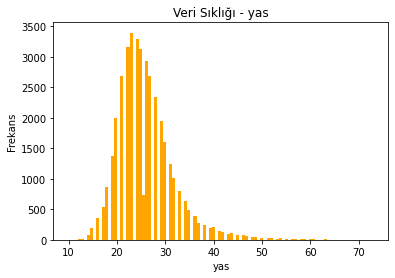

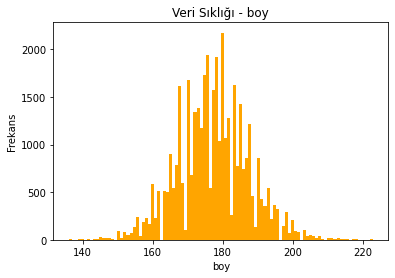

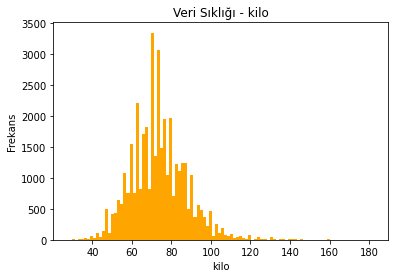

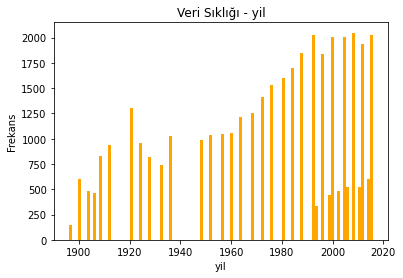

In [ ]:
# tüm sayısal değişkenler için histogram grafiğini çizdirelim

sayisal_degisken = ["yas", "boy", "kilo", "yil"]
for i in sayisal_degisken:
  plotHistogram(i)

In [ ]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


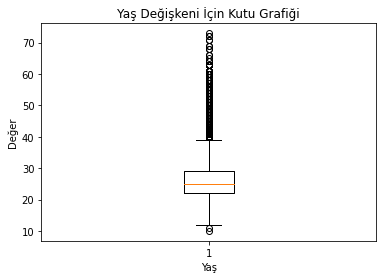

In [ ]:
# yaş değişkeni için kutu grafiği 

plt.boxplot(veri.yas)
plt.title("Yaş Değişkeni İçin Kutu Grafiği")
plt.xlabel("Yaş")
plt.ylabel("Değer")
plt.show()

In [ ]:
# çubuk grafiğiniz çizdireceğimiz fonksyonu yazalım

def plotBar(degisken, n = 5):
  """
    Girdi : degisken / Sütun ismi, n / gösterilecek en sık rastlanan değer sayısı
    Çıktı : Bar grafiği
  """
  veri_ = veri[degisken]
  veri_sayma = veri_.value_counts()
  veri_sayma = veri_sayma[:n]
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color = "orange")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation = 45)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}\n{veri_sayma}")

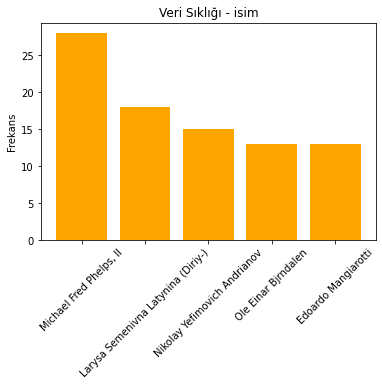

isim
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


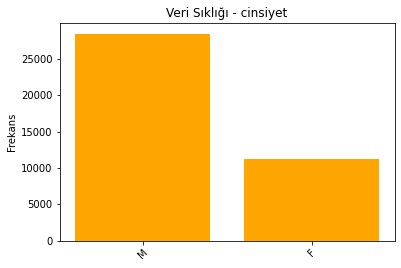

cinsiyet
M    28530
F    11253
Name: cinsiyet, dtype: int64


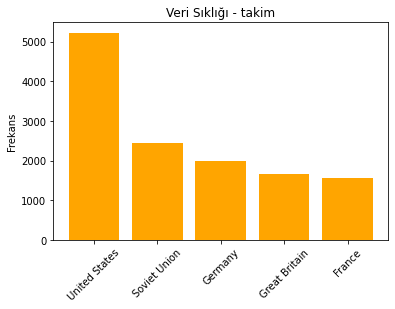

takim
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


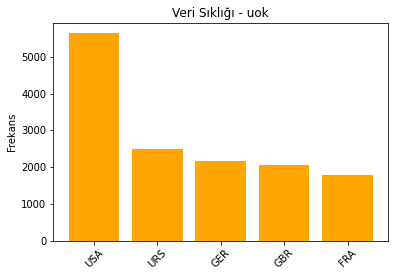

uok
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


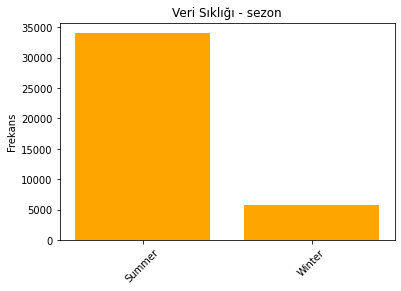

sezon
Summer    34088
Winter     5695
Name: sezon, dtype: int64


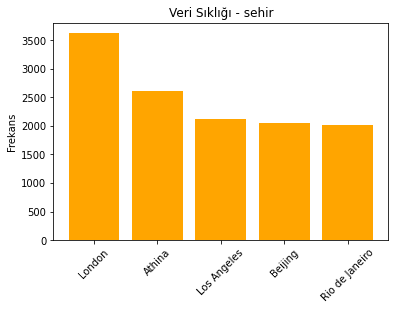

sehir
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


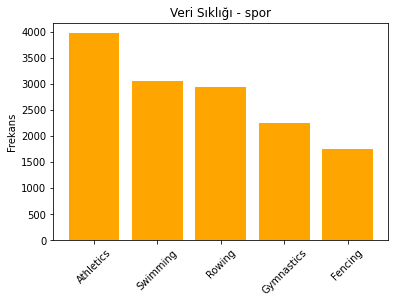

spor
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


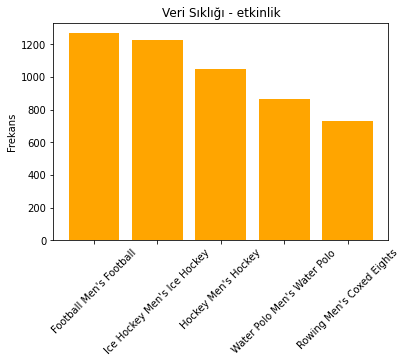

etkinlik
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


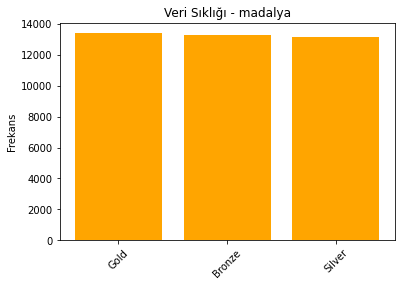

madalya
Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [ ]:
kategorik_degisken = ["isim", "cinsiyet", "takim", "uok", "sezon", "sehir", "spor", "etkinlik", "madalya"]
for i in kategorik_degisken:
  plotBar(i)

In [ ]:
# cinsiyete göre boy ve ağırlık karşılaştırması

erkek = veri[veri.cinsiyet == "M"]
erkek.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [ ]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


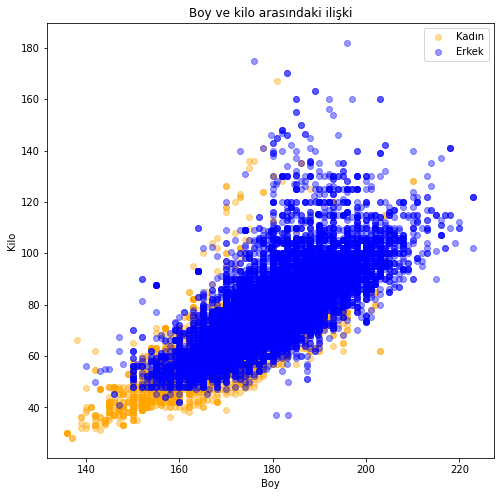

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(kadin.boy, kadin.kilo, alpha = 0.4, label = "Kadın", color = "orange")
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4, label = "Erkek", color = "b")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve kilo arasındaki ilişki")
plt.legend()
plt.show()

In [ ]:
veri.loc[:,["yas", "boy", "kilo"]].corr()  # korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


In [ ]:
# madalya ve yaş arasındaki ilişki
# # sporuclarımızı altın, bronz ve gümüş madalyaya göre ayıralım

veri_kopya = veri.copy()
veri_kopya = pd.get_dummies(veri_kopya, columns = ["madalya"])
veri_kopya.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [ ]:
veri_kopya.loc[:,["yas", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [ ]:
# takımların kazandıkları altın, bronz ve gümüş madalya sayıları
veri_kopya[["takim", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["takim"], as_index = False).sum().sort_values(by = "madalya_Gold", ascending = False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


In [ ]:
# sehirlere göre kazanılan madalyaların hangi şehirlerde kazanıldığı
veri_kopya[["sehir", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["sehir"], as_index = False).sum().sort_values(by = "madalya_Gold", ascending = False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


In [ ]:
# cinsiyete göre kazanılan madalyaların hangi şehirlerde kazanıldığı
veri_kopya[["cinsiyet", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["cinsiyet"], as_index = False).sum().sort_values(by = "madalya_Gold", ascending = False)

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


In [ ]:
# pivot tablo
veri_pivot = veri.pivot_table(index = "madalya", columns = "cinsiyet", values = ["boy", "kilo", "yas"], aggfunc = {"boy": np.mean, "kilo": np.mean, "yas": [min, max, np.std]})
veri_pivot.head()

boy                   kilo  ...   yas                    
                mean                   mean  ...   min       std          
cinsiyet           F           M          F  ...     M         F         M
madalya                                      ...                          
Bronze    170.003227  180.045806  62.757125  ...  10.0  5.329229  5.870340
Gold      170.448727  180.318906  63.199349  ...  13.0  5.219615  5.987807
Silver    170.233783  180.053626  62.866892  ...  13.0  5.253111  6.098221

[3 rows x 10 columns]

In [ ]:
# anomali tespiti ve aykırı değer analizi
def anomaliTespitYap(df, ozellik):
  outlier_indices = []
  for c in ozellik:
    # 1. çeyrek
    q1 = np.percentile(df[c], 25)

    # 3. çeyrek
    q3 = np.percentile(df[c], 75)

    outlier_step = 1.5 * (q3 - q1) 
    outlier_list_col = df[(df[c] < q1 - outlier_step) | (df[c] > q3 + outlier_step)]
    outlier_indices.extend(outlier_list_col)

  outlier_indices = Counter(outlier_indices)

# eğer bir örnek v adet sütunda farklı değer ise bunu aykırı değer kabul edelim
  multiple_outliers = list(i for i ,v in outlier_indices.items() if v > 1)
  return multiple_outliers



In [ ]:
veri_anomali = anomaliTespitYap(veri, ["yas", "boy", "kilo"])
veri_anomali = veri[veri_anomali]
veri_anomali.spor.value_counts()

Athletics        3969
Swimming         3048
Rowing           2945
Gymnastics       2256
Fencing          1743
                 ... 
Motorboating        7
Roque               3
Jeu De Paume        3
Basque Pelota       2
Aeronautics         1
Name: spor, Length: 66, dtype: int64

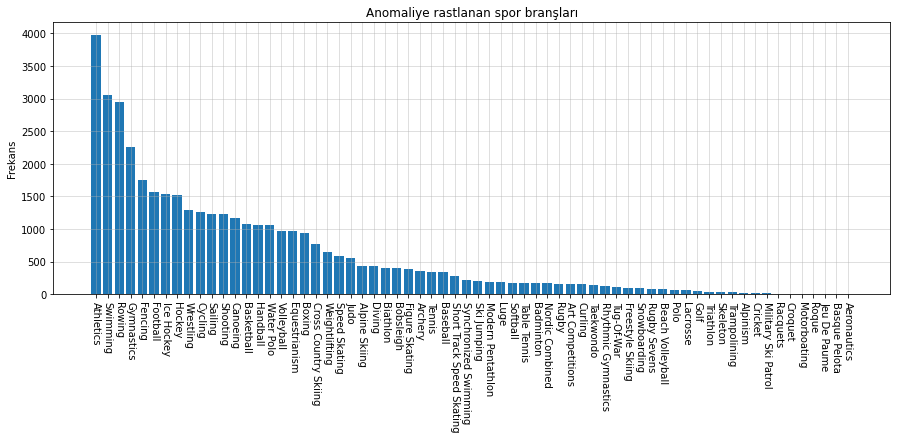

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation = 270)
plt.ylabel("Frekans")
plt.title("Anomaliye rastlanan spor branşları")
plt.grid(True, alpha = 0.5)
plt.show()